# LeR complete examples

* Please refer to the [documentation](https://ler.readthedocs.io/en/latest/) for more details.

## TOC:

* [Generating particular number of detectable events](##bullet-four)
  * [Unlensed case](###bullet-four-one)
  * [Lensed case](###bullet-four-two)

## Generating particular number of detectable events. <a class="anchor" id="bullet-four"></a>

* this is particularly useful when you want only the detectable events to be saved in the json file

* detectable event rates will be calculated at each batches. Subsequent batch will consider the previous batch's detectable events. So, the rates will become more accurate as the batch number increases and will converge to a stable value at higher samples. 

* you can resume the rate calculation from the last saved batch.

In [33]:
from ler.rates import LeR

# class initialization
ler = LeR(npool=8, verbose=False)

### Unlensed case. <a class="anchor" id="bullet-four-one"></a>

* SNR>8

In [34]:
n_size_unlensed_param = ler.selecting_n_unlensed_detectable_events(
    size=5000, 
    snr_threshold=10.0,
    batch_size=100000,
    resume=False,
    output_jsonfile='unlensed_params_n_detectable.json',
    meta_data_file="meta_unlensed.json",
    )

removing ./ler_data/unlensed_params_n_detectable.json and ./ler_data/meta_unlensed.json if they exist
collected number of detectable events =  0
given detectability_condition == 'step_function'
collected number of detectable events =  422
total number of events =  100000
total rate (yr^-1): 436.86662367311965
given detectability_condition == 'step_function'
collected number of detectable events =  841
total number of events =  200000
total rate (yr^-1): 435.31378022404454
given detectability_condition == 'step_function'
collected number of detectable events =  1255
total number of events =  300000
total rate (yr^-1): 433.0707841309361
given detectability_condition == 'step_function'
collected number of detectable events =  1705
total number of events =  400000
total rate (yr^-1): 441.2663467788323
given detectability_condition == 'step_function'
collected number of detectable events =  2094
total number of events =  500000
total rate (yr^-1): 433.5538909817594
given detectability_condi

**Important Note**: At each iteration, rate is calculated using the cummulatively increasing number of events. It will become stable at around 2 million events. This is the number of events that is required to get a stable rate. Below, I am showing visualization of how rate changes with increasing number of events.

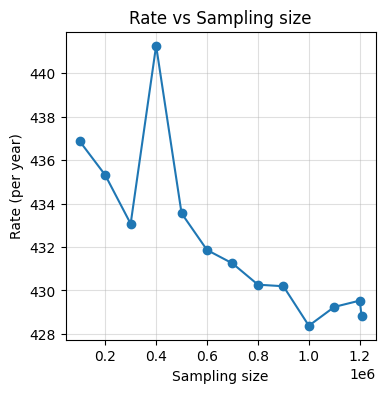

In [35]:
from ler.utils import get_param_from_json
# getting data from json
meta_data= get_param_from_json("./ler_data/meta_unlensed.json")

# plot the rate vs sampling size
plt.figure(figsize=(4,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

### Lensed case. <a class="anchor" id="bullet-four-two"></a>

* 2 images, snr>8 (super-threshold)
* 1 image, snr>6 (sub+super-threshold)

In [36]:
n_size_lensed_param = ler.selecting_n_lensed_detectable_events(
    size=500,
    snr_threshold=[8.0,6.0],
    num_img=[2,1],
    batch_size=50000,
    resume=False,
    output_jsonfile='lensed_params_n_detectable.json',
    meta_data_file="meta_lensed.json",
    )

removing ./ler_data/lensed_params_n_detectable.json and ./ler_data/meta_lensed.json if they exist
collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.57it/s]


given detectability_condition == step_function
collected number of detectable events =  112
total number of events =  50000
total rate (yr^-1): 0.508493641457471


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.66it/s]


given detectability_condition == step_function
collected number of detectable events =  212
total number of events =  100000
total rate (yr^-1): 0.48125291066510645


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 38.02it/s]


given detectability_condition == step_function
collected number of detectable events =  317
total number of events =  150000
total rate (yr^-1): 0.4797395367321973


100%|███████████████████████████████████████████████████████| 50000/50000 [00:11<00:00, 4289.40it/s]


given detectability_condition == step_function
collected number of detectable events =  433
total number of events =  200000
total rate (yr^-1): 0.4914681847122432


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.09it/s]


given detectability_condition == step_function
collected number of detectable events =  531
total number of events =  250000
total rate (yr^-1): 0.48216093502485197
storing detectable lensed params in ./ler_data/lensed_params_n_detectable.json
storing meta data in ./ler_data/meta_lensed.json

 trmming final result to size=500
collected number of detectable events =  500
total number of events =  235405.0
total lensed event rate (yr^-1): 0.4821607228741339


In [37]:
print(n_size_lensed_param.keys())
print(f"size of each parameters={len(n_size_lensed_param['zl'])}")

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'snr_net', 'L1', 'H1', 'V1'])
size of each parameters=500
